<a href="https://colab.research.google.com/github/vmpreciado/NETS3120/blob/main/FBClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook to play with the Facebook subgraph dowloaded from the SNAP library...

In [1]:
# Import necessary libraries
from google.colab import drive
import networkx as nx

# Mount Google Drive
drive.mount('/content/drive')

# Path to your file on Google Drive: 1) Download facebook_combined.txt.gz; 2) Decompressed as a .txt; 3) Rename and locate wherever you like...
file_path = '/content/drive/My Drive/ColabNotebooks/FacebookSmall.txt'

# Create a new graph and name it FB
FB = nx.Graph()# Create a graph from the edgelist file
FB = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)

# Perform initial checks
print(f"Number of nodes: {FB.number_of_nodes()}")
print(f"Number of edges: {FB.number_of_edges()}")

Mounted at /content/drive
Number of nodes: 4039
Number of edges: 88234


Let's compute a sequence of clustering coefficients for each node. Let's plot a histogram of the values and the total average in the graph. (By convention, isolated nodes have a clustering coefficient equal to zero.)

Average Clustering Coefficient: 0.6055467186200876


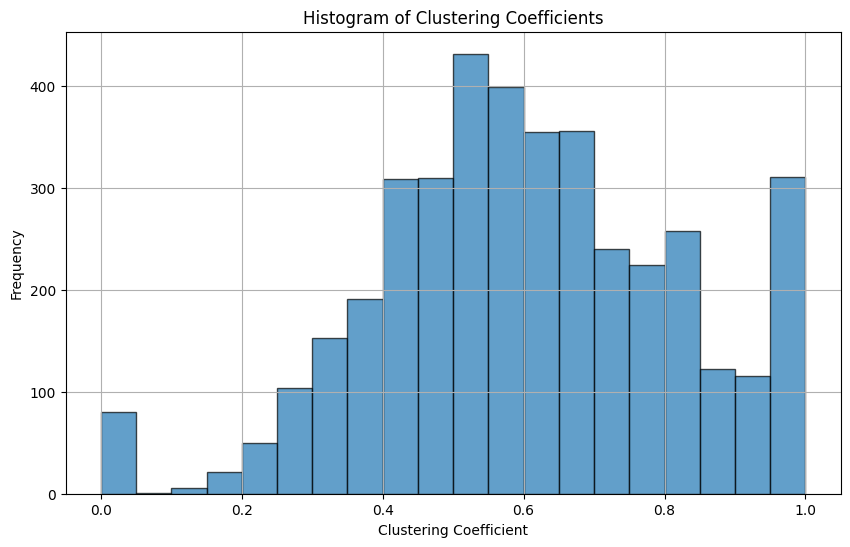

In [2]:
import matplotlib.pyplot as plt

# Computing clustering coefficients for each node
clustering_coefficients = nx.clustering(FB)
clustering_coefficients_list = list(clustering_coefficients.values()) # transform into a list for convenience

# Computing the average clustering coefficient
average_clustering_coefficient = nx.average_clustering(FB)
print(f"Average Clustering Coefficient: {average_clustering_coefficient}")

# Create a histogram of the clustering coefficients
plt.figure(figsize=(10, 6))
plt.hist(clustering_coefficients_list, bins=20, edgecolor='black', alpha=0.7)

plt.title('Histogram of Clustering Coefficients')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This is a very high average clustering coefficient, indicating that the subgraph of facebook we are analyzing is part of a community. The average clustering coefficient equal to 0.60 can be interpreted as follows: The probability of two random friends of a random node being connected is approx 60%

Let's shift gears and evaluate the use of Jacard and AA indexes as predictors of connected nodes.

In [4]:
import random

# Computing the degree of each node
degrees = dict(FB.degree())
nodes = list(FB.nodes())

# Initialize lists to store the indices
connected_jaccard, disconnected_jaccard = [], []
connected_adamic_adar, disconnected_adamic_adar = [], []

while len(connected_jaccard) < 10000 or len(disconnected_jaccard) < 10000:
    i, j = random.sample(nodes, 2)

    # Compute the common neighbors and total unique neighbors
    neighbors_i = set(FB.neighbors(i))
    neighbors_j = set(FB.neighbors(j))
    common_neighbors = neighbors_i.intersection(neighbors_j)
    all_neighbors = neighbors_i.union(neighbors_j)

    # Compute Jaccard index
    jaccard_index = len(common_neighbors) / len(all_neighbors) if all_neighbors else 0

    # Compute Adamic-Adar index
    adamic_adar_index = sum(1 / np.log(degrees[k]) for k in common_neighbors) if common_neighbors else 0

    if FB.has_edge(i, j):
        if len(connected_jaccard) < 10000:
            connected_jaccard.append(jaccard_index)
            connected_adamic_adar.append(adamic_adar_index)
    else:
        if len(disconnected_jaccard) < 10000:
            disconnected_jaccard.append(jaccard_index)
            disconnected_adamic_adar.append(adamic_adar_index)

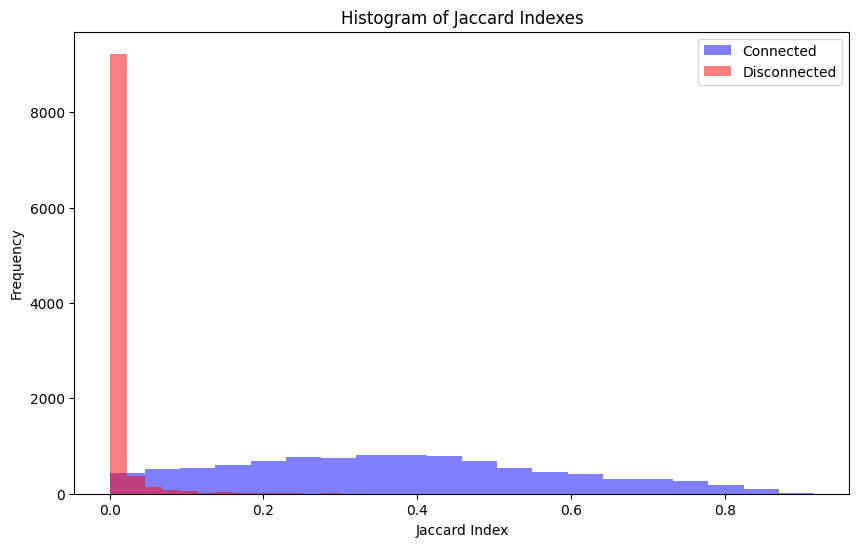

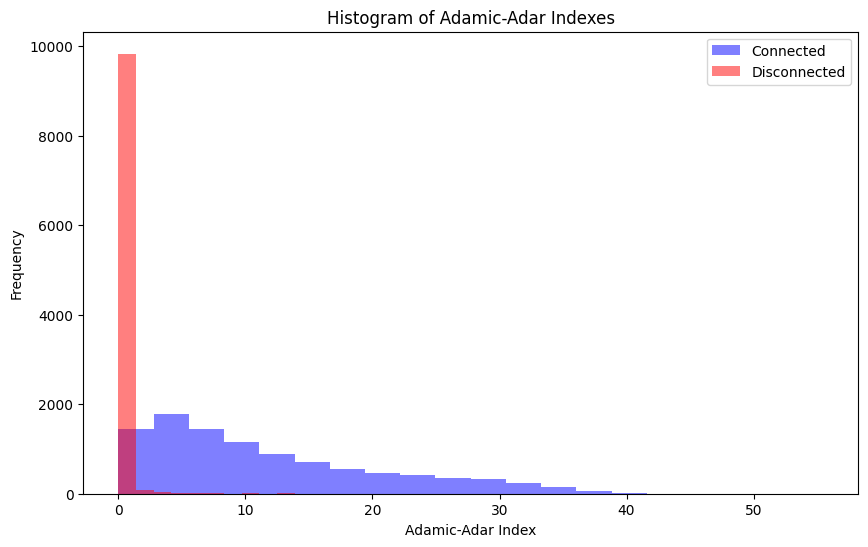

In [5]:
# Determine the range of the data
data_range = [min(connected_jaccard + disconnected_jaccard), max(connected_jaccard + disconnected_jaccard)]

# Determine the number of bins for the blue histogram
n_bins_blue = 20  # This is an example; adjust the number of bins as needed

# Plotting histograms
plt.figure(figsize=(10, 6))
plt.hist(connected_jaccard, bins=n_bins_blue, range=data_range, color='blue', alpha=0.5, label='Connected')
plt.hist(disconnected_jaccard, bins=n_bins_blue * 2, range=data_range, color='red', alpha=0.5, label='Disconnected')
plt.title('Histogram of Jaccard Indexes')
plt.xlabel('Jaccard Index')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Determine the range of the data
data_range = [min(connected_adamic_adar + disconnected_adamic_adar), max(connected_adamic_adar + disconnected_adamic_adar)]

# Determine the number of bins for the blue histogram
n_bins_blue = 20  # Adjust the number of bins as needed based on your data

# Plotting histograms
plt.figure(figsize=(10, 6))
plt.hist(connected_adamic_adar, bins=n_bins_blue, range=data_range, color='blue', alpha=0.5, label='Connected')
plt.hist(disconnected_adamic_adar, bins=n_bins_blue * 2, range=data_range, color='red', alpha=0.5, label='Disconnected')
plt.title('Histogram of Adamic-Adar Indexes')
plt.xlabel('Adamic-Adar Index')
plt.ylabel('Frequency')
plt.legend()
plt.show()